In [109]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 14

In [110]:
#funciones para los metodos

def lax_friedrichs(U_inicial,nt,dt,nx):
    
    dx = Lx/(nx-1)
    
    U = U_inicial.copy()
    f = flux(U)
    
    for n in range(nt):
        
        Un = U.copy()
        fn = f.copy()

        Ux = 0.5*(Un[:,2:] + Un[:,:-2])
        fx = 0.5*(fn[:,2:] - fn[:,:-2])

        U[:,1:-1] = Ux - (dt/dx)*fx
        U[:,0] = U[:,1]
        U[:,-1] = U[:,-2]
        
        f = flux(U)
            
    return U,f
      
 #-------------------------   
   
def richtmyers(U_inicial,nt,dt,nx):
    
    dx = Lx/(nx-1)
    
    U = U_inicial.copy()
    f = flux(U)
    U1 = U.copy()
    f1 = f.copy()
    U2 = U.copy()
    f2 = f.copy()
    
    for n in range(nt):
        
        Un = U.copy()
        fn = f.copy()

        U1[:,1:-1] = 0.5*(Un[:,2:] + Un[:,1:-1]) - (dt/dx)*0.5*(fn[:,2:] - fn[:,1:-1])
        U2[:,1:-1] = 0.5*(Un[:,1:-1] + Un[:,:-2]) - (dt/dx)*0.5*(fn[:,1:-1] - fn[:,:-2])
        
        U[:,1:-1] = Un[:,1:-1] - (dt/dx)*(flux(U1)[:,1:-1]-flux(U2)[:,1:-1])
        U[:,0] = U[:,1]
        U[:,-1] = U[:,-2]
        
        f = flux(U)

    return U,f

    
#---------------------
    
def obtener_var(A):
    rho = A[0,:].copy()
    u = (A[1,:]/rho)
    E = A[2,:].copy()
    p = (gamma-1)*(E-0.5*rho*u**2)
    R = 287
    T = p/(rho*R)
    
    return rho,u,E,p,T

def flux(A):
    f = np.zeros((3,nx))
    rho,u,E,p,_ = obtener_var(A)
    
    f[0,:] = np.full(nx,u*rho)
    f[1,:] = np.full(nx,rho*u**2+p) 
    f[2,:] = np.full(nx,u*E+u*p)
    
    return f

In [111]:
#propiedades

gamma = 1.4

rho1 = 1
u1 = 0
p1 = 1
E1 = p1/(gamma-1) + 0.5*rho1*u1**2

rho2 = 0.125
u2 = 0
p2 = 0.1
E2 = p2/(gamma-1) + 0.5*rho2*u2**2

In [112]:
dt = 0.0001
nx = 1500 #ojalá par

Lx = 2


In [113]:
U_inicial = np.zeros((3,nx))
U_inicial[0,:] = np.concatenate((np.full(nx//2,rho1),np.full(nx//2,rho2)))
U_inicial[1,:] = np.concatenate((np.full(nx//2,u1*rho1),np.full(nx//2,u2*rho2))) 
U_inicial[2,:] = np.concatenate((np.full(nx//2,E1),np.full(nx//2,E2))) 


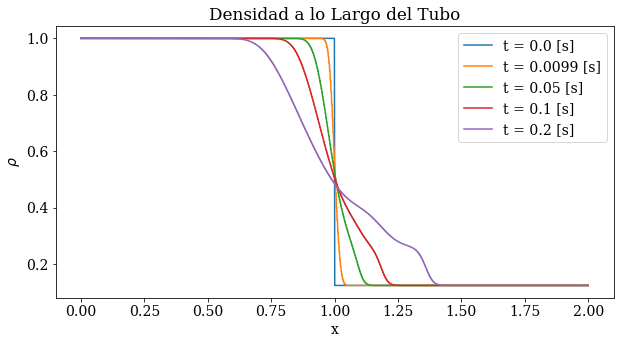

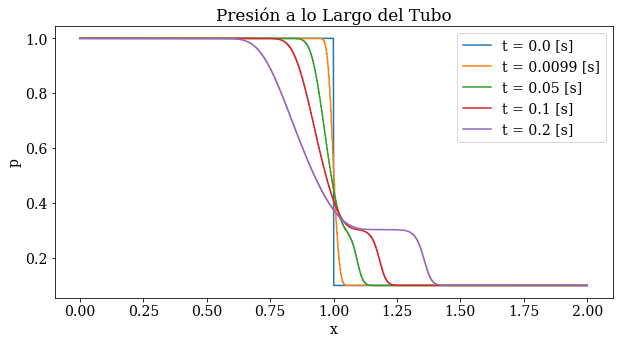

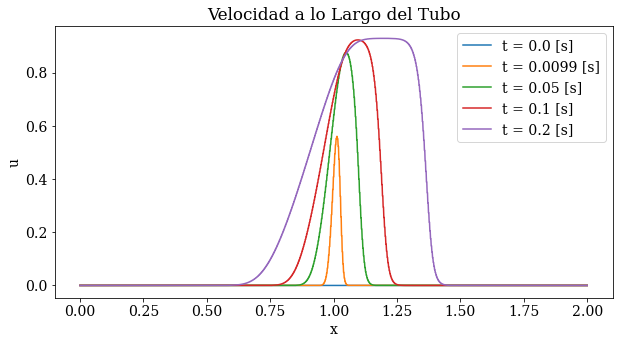

In [115]:
#graficos de lax friedrichs

def graficar(variable,U):
    rho,u,E,p,T = obtener_var(U)
    if variable == 'Densidad':
        return rho
    elif variable == 'Velocidad':
        return u
    elif variable == 'Presión':
        return p

    
var = [(r'$\rho$','Densidad'),('p','Presión'),('u','Velocidad')]
ts = np.array([0,0.01,0.05,0.1,0.2])
nts = ts//dt
x = np.linspace(0,Lx,nx)


for var_g in var: 
    for ntx in nts:
        tf = ntx*dt
        U,f = lax_friedrichs(U_inicial,int(ntx),dt,nx)

        plt.plot(x,graficar(var_g[1],U),label=f't = {tf} [s]')

    plt.legend()
    plt.xlabel('x')
    plt.ylabel(var_g[0])
    plt.title(f'{var_g[1]} a lo Largo del Tubo')
    fig = plt.gcf()
    fig.set_size_inches(10,5)
    plt.show();


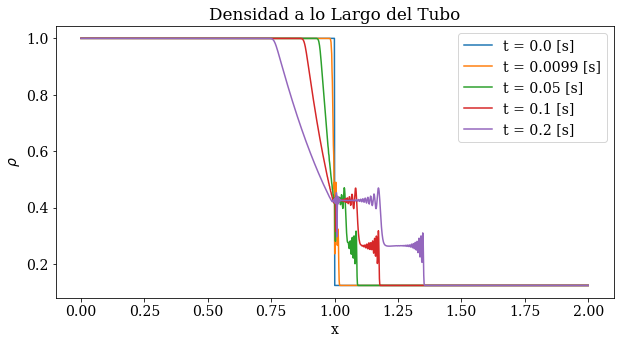

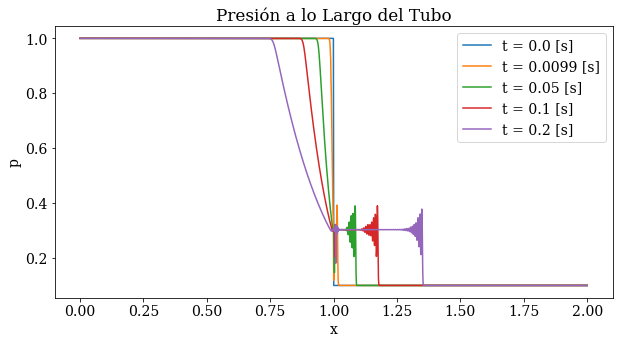

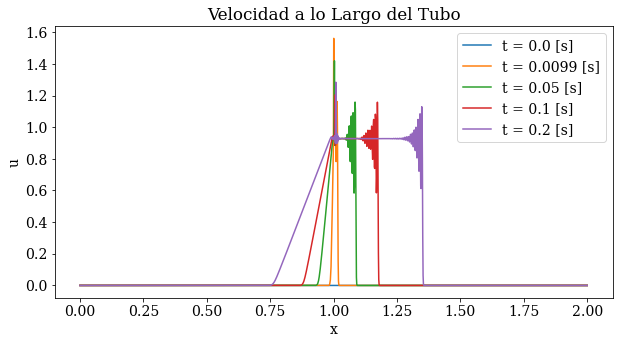

In [116]:
#graficos de richtmyers

for var_g in var: 
    for ntx in nts:
        tf = ntx*dt
        U,f = richtmyers(U_inicial,int(ntx),dt,nx)

        plt.plot(x,graficar(var_g[1],U),label=f't = {tf} [s]')

    plt.legend()
    plt.xlabel('x')
    plt.ylabel(var_g[0])
    plt.title(f'{var_g[1]} a lo Largo del Tubo')
    fig = plt.gcf()
    fig.set_size_inches(10,5)
    plt.show();

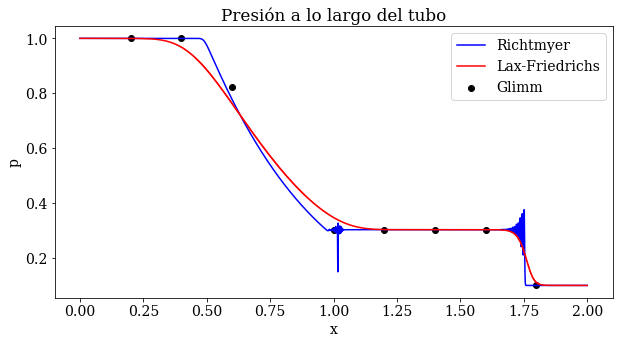

In [107]:
#graficos de comparacion con publicacion


x = np.linspace(0,Lx,nx)

nt = 0.43/dt

tf = nt*dt
U,f = richtmyers(U_inicial,int(nt),dt,nx)

rho,u,E,p,T = obtener_var(U)

plt.plot(x,p,label=f'Richtmyer',color='b')

U,f = lax_friedrichs(U_inicial,int(nt),dt,nx)

rho,u,E,p,T = obtener_var(U)

plt.plot(x,p,label=f'Lax-Friedrichs',color='r')

xx = np.array([0.1,0.2,0.3,0.5,0.6,0.7,0.8,0.9])*2
pp = [1,1,0.822,0.303,0.303,0.303,0.303,0.1]

plt.scatter(xx,pp,color='k',label='Glimm')

plt.legend()
plt.xlabel('x')
plt.ylabel('p')
plt.title("Presión a lo largo del tubo")
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.show();

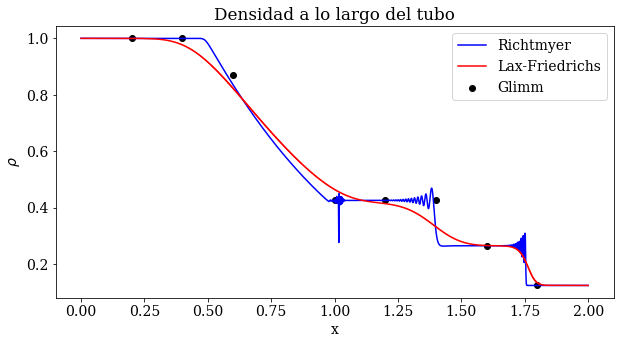

In [88]:
x = np.linspace(0,Lx,nx)

nt = 0.43/dt

tf = nt*dt

xx = np.array([0.1,0.2,0.3,0.5,0.6,0.7,0.8,0.9])*2
pp = [1,1,0.869,0.426,0.426,0.426,0.266,0.125]

plt.scatter(xx,pp,color='k',label='Glimm')

U,f = richtmyers(U_inicial,int(nt),dt,nx)

rho,u,E,p,T = obtener_var(U)

plt.plot(x,rho,label=f'Richtmyer',color='b')

U,f = lax_friedrichs(U_inicial,int(nt),dt,nx)

rho,u,E,p,T = obtener_var(U)

plt.plot(x,rho,label=f'Lax-Friedrichs',color='r')



plt.legend()
plt.xlabel('x')
plt.ylabel(r'$\rho$')
plt.title("Densidad a lo largo del tubo")
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.show();

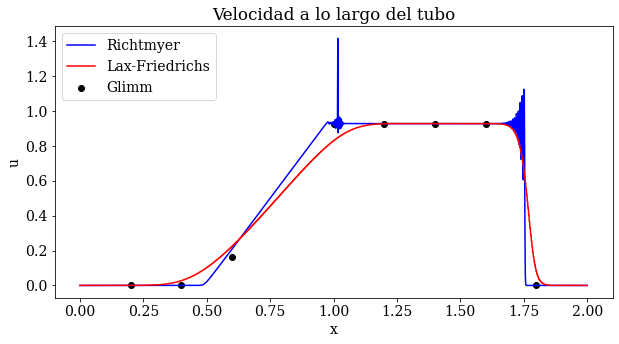

In [89]:

x = np.linspace(0,Lx,nx)

nt = 0.43/dt

tf = nt*dt

xx = np.array([0.1,0.2,0.3,0.5,0.6,0.7,0.8,0.9])*2
pp = [0,0,0.164,0.927,0.927,0.927,0.927,0]

plt.scatter(xx,pp,color='k',label='Glimm')

U,f = richtmyers(U_inicial,int(nt),dt,nx)

rho,u,E,p,T = obtener_var(U)

plt.plot(x,u,label=f'Richtmyer',color='b')

U,f = lax_friedrichs(U_inicial,int(nt),dt,nx)

rho,u,E,p,T = obtener_var(U)

plt.plot(x,u,label=f'Lax-Friedrichs',color='r')



plt.legend()
plt.xlabel('x')
plt.ylabel('u')
plt.title("Velocidad a lo largo del tubo")
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.show();